In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [64]:
FINAL_DATASET_PATH = os.path.join("final_dataset", "final_dataset.csv")

whole_steam_data = pd.read_csv(FINAL_DATASET_PATH)

In [65]:
whole_steam_data.columns

Index(['Unnamed: 0', 'appid', 'user_reviews', 'desc', 'full_desc', 'popu_tags',
       'name', 'release_date', 'english', 'developer',
       ...
       'Captions available', 'In-App Purchases', 'MMO', 'VR Support',
       'Commentary available', 'Valve Anti-Cheat enabled',
       'Steam Turn Notifications', 'SteamVR Collectibles',
       'Includes Source SDK', 'Mods'],
      dtype='object', length=132)

In [66]:
whole_steam_data.head()

,Unnamed: 0,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,...,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods
0,0,10,1,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
1,1,20,1,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
2,2,30,1,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
3,3,40,0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
4,4,50,1,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,...,0,0,0,0,0,1,0,0,0,0


# Analysis

Let's take a look at value count of different statistics.

As we can see, 10_000 estimated number of copies sold is leaving the other numbers behind, meaning most games are niche, indie games, not big blockbuster games.

<AxesSubplot:xlabel='Estimated number of owners', ylabel='Counts'>

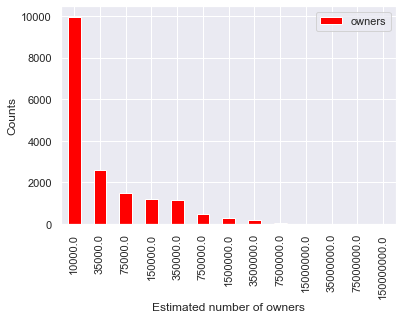

In [67]:
owners_data = whole_steam_data["owners"]

owners_data.value_counts().plot(kind="bar", legend=True, color="red", xlabel="Estimated number of owners", ylabel="Counts")

<AxesSubplot:xlabel='Does have English', ylabel='Counts'>

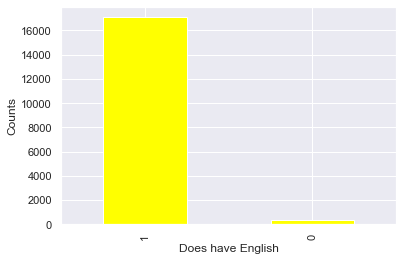

In [68]:
english_data = whole_steam_data["english"]

english_data.value_counts().plot(kind="bar", color="yellow", xlabel="Does have English", ylabel="Counts")

As we can see, Windows is platform of choice for practically all developers whereas around 25% of games don't apper at Mac and Linux platforms. 

<BarContainer object of 2 artists>

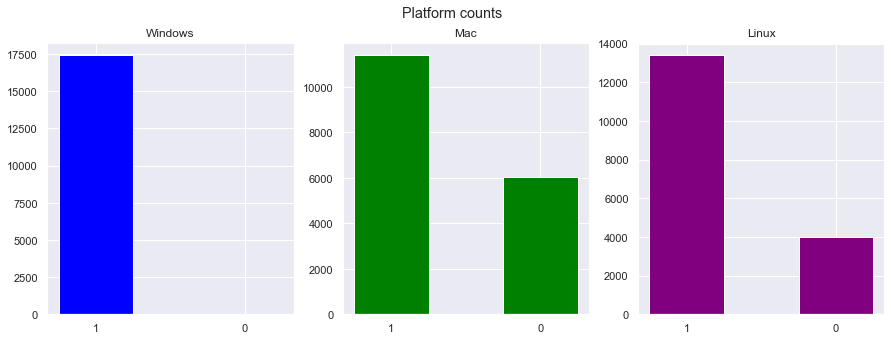

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Platform counts")
ax1.set_title("Windows")
ax1.bar(["1", "0"], list(whole_steam_data.windows.value_counts()), color="blue", width=0.5)

ax2.set_title("Mac")
ax2.bar(["1", "0"], list(whole_steam_data.mac.value_counts()), color="green", width=0.5)

ax3.set_title("Linux")
ax3.bar(["1", "0"], list(whole_steam_data.linux.value_counts()), color="purple", width=0.5)


Achievements data.

In [70]:
print(whole_steam_data.achievements.nunique())

369


Average and median playtime vary vastly across the games.

In [71]:
print(whole_steam_data.average_playtime.nunique())
print(whole_steam_data.median_playtime.nunique())

1313
1284


Corelation heatmap. As we can see, most elements don't have strong correlation, except maybe some popular tags, which is expected by this dataset.

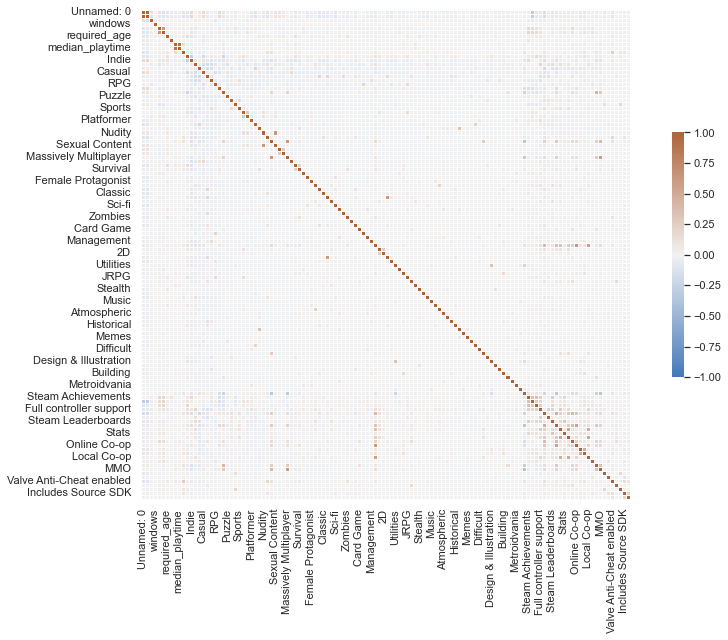

In [72]:
corr_matrix = whole_steam_data.loc[:, whole_steam_data.columns != "user_reviews"].corr()

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 9))
cmap = sns.diverging_palette(250, 30, as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap, vmin=-1, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [73]:
# sns.pairplot(whole_steam_data)
# plt.show()